# Tutorial 5.1: Synaptic Responses to Changes in Inputsx
## Neuroscience goal
- understand contrasting effects of synaptic depression and facilitation on steady-state and transient responses of synapses to changes in presynaptic rates
## Computational goal
- gain more practice with time-varying Poisson process
- combine multiple variables with stepwise changes and continuous variation in coupled ODEs

### Overview
- will treat spike train of a presynaptic neuron as a Poisson process whose emission rate will change stepwise at discrete times
- will examine synaptic response to these inputs first in a synapse without short-term changes in efficacy
- second in a synapse with synaptic depression
- finally in a synapse with synaptic facilitation
- simulate response of a postsynaptic LIF neuron to these inputs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### a. produce time vector
### b. produce vector with presynaptic rates of 20/100/10/50Hz for each 1-s portion

Text(0.5, 1.0, 'presynaptic firing rates')

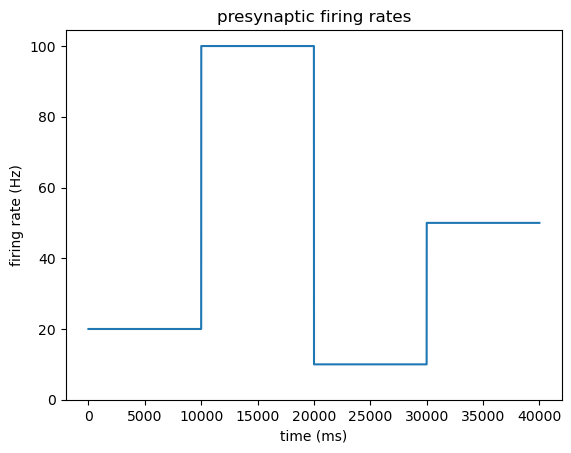

In [15]:
dt = 1e-4
t = np.arange(0, 4, dt)
presyn_hz = np.zeros_like(t)
quarter = int(len(t) / 4)

presyn_hz[:quarter] = 20
presyn_hz[quarter:quarter*2] = 100
presyn_hz[quarter*2:quarter*3] = 10
presyn_hz[quarter*3:] = 50

# verify presynaptic firing rate vector
plt.plot(presyn_hz)
plt.ylim(0)
plt.xlabel('time (ms)')
plt.ylabel('firing rate (Hz)')
plt.title('presynaptic firing rates')


### c. produce array of ones and zeros representing Poisson spike train
- such that probability of spike in any time bin of size $\delta t$ is equal to $\delta t \times r(t)$ where $r(t)$ is firing rate at the time-bin generated in b
- ignore possibility of multiple spikes in a time-bin

In [25]:
p_spike = presyn_hz * dt
spike_train = np.random.rand(len(t)) < p_spike

182

### d. produce synaptic conductance vector
- $G_{syn} (t)$, which increments by $\Delta G = 1nS$ when each spike arrives and decays back to zero between spikes with a time constant of 100ms
- plot $G_{syn}$ against time

In [33]:
delta_g = 1e-9
tau = 0.1

g_syn = np.zeros_like(t)

for i in range(1, len(t)):
    # decay conductance
    g_syn[i] = g_syn[i - 1] * np.exp(-dt / tau)

    # increase if spike
    if spike_train[i] == 1:
        g_syn[i] += delta_g

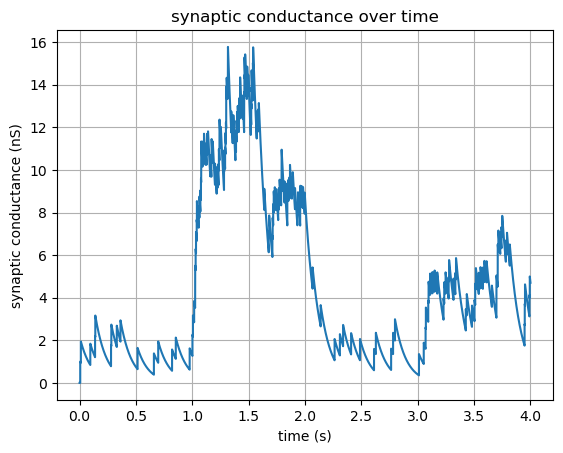

In [34]:
plt.plot(t, g_syn * 1e9)
plt.title('synaptic conductance over time')
plt.xlabel('time (s)')
plt.ylabel('synaptic conductance (nS)')
plt.grid(True)

### e. produce synaptic depression vector
- assume initial release probability of $p0 = 0.5$ and produce depression vector, $D(t)$
    - initialized to 1
    - decreased by an amount $p0D(t)$ following each spike at time $t$
    - recovers via $(dD(t))/dt = (1 - D(t))/\tau_D$ with time constant of $\tau_D = 0.25s$

In [37]:
tau = 0.25
p0 = 0.5

depression = np.ones_like(t)

for i in range(1, len(t)):
    # recover
    dd_dt = (1 - depression[i - 1]) / tau
    depression[i] = depression[i - 1] + dd_dt * dt

    # decrease if spike
    if spike_train[i] == 1:
        depression[i] -= p0*depression[i]


Text(0, 0.5, 'synaptic depression')

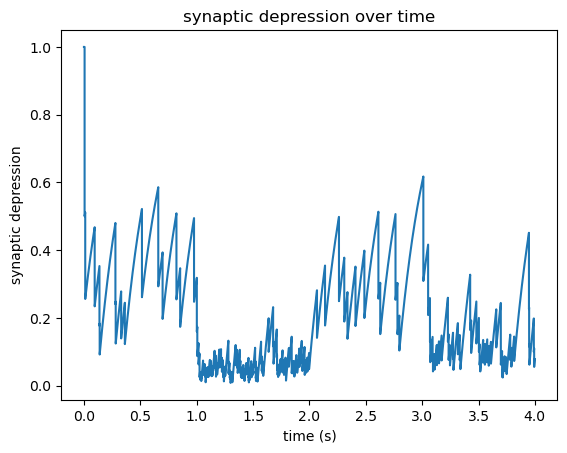

In [39]:
plt.plot(t, depression)
plt.title('synaptic depression over time')
plt.xlabel('time (s)')
plt.ylabel('synaptic depression')

In [ ]:
plt.plot(t, depression)

c:\Users\paul.olsen\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2914: RuntimeWarning: overflow encountered in scalar subtract
  delta = (x1t - x0t) * margin
c:\Users\paul.olsen\Anaconda3\lib\site-packages\matplotlib\transforms.py:383: RuntimeWarning: overflow encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


Error in callback <function _draw_all_if_interactive at 0x000001B9EA9F5280> (for post_execute):


IndexError: index 0 is out of bounds for axis 0 with size 0

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 640x480 with 1 Axes>

In [ ]:
plt.plot(t, depression)

c:\Users\paul.olsen\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2914: RuntimeWarning: overflow encountered in scalar subtract
  delta = (x1t - x0t) * margin
c:\Users\paul.olsen\Anaconda3\lib\site-packages\matplotlib\transforms.py:383: RuntimeWarning: overflow encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


Error in callback <function _draw_all_if_interactive at 0x000001B9EA9F5280> (for post_execute):


IndexError: index 0 is out of bounds for axis 0 with size 0

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 640x480 with 1 Axes>